# Diabetes Analysis

### Author: Ly Duc Trung

### Link: https://github.com/DucTrung1802/DS/blob/main/GLM_Report/diabetes_analysis_upgrade.ipynb

### Dataset Link: https://www.archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

## 0. Install and import libraries

### 0.1. Check R version

In [314]:
R.Version()

$platform
[1] "x86_64-w64-mingw32"

$arch
[1] "x86_64"

$os
[1] "mingw32"

$system
[1] "x86_64, mingw32"

$status
[1] ""

$major
[1] "4"

$minor
[1] "0.5"

$year
[1] "2021"

$month
[1] "03"

$day
[1] "31"

$`svn rev`
[1] "80133"

$language
[1] "R"

$version.string
[1] "R version 4.0.5 (2021-03-31)"

$nickname
[1] "Shake and Throw"

### 0.2. Install

In [315]:
# INSTALL THESE PACKAGES IN CONDA TERMINAL


### 0.3. Import

In [374]:
library(ggplot2)
library(ROSE)
library(psych)
library(DescTools)
library(BSDA)

Loading required package: lattice


Attaching package: 'BSDA'


The following object is masked from 'package:datasets':

    Orange




In [317]:
### 0.4. Constants

In [318]:
SEED = 123
MAIN_COLOR = "#1155cc"

## 1. Import Data

In [319]:
input_data = read.csv("diabetes_full_data.csv")

In [320]:
df = data.frame(input_data)

In [321]:
df

X,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,⋯,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,1,1,1,40,1,0,0,0,0,⋯,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,⋯,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,⋯,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,⋯,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,⋯,0,2,3,0,0,0,11,5,4,0
5,1,1,1,25,1,0,0,1,1,⋯,0,2,0,2,0,1,10,6,8,0
6,1,0,1,30,1,0,0,0,0,⋯,0,3,0,14,0,0,9,6,7,0
7,1,1,1,25,1,0,0,1,0,⋯,0,3,0,0,1,0,11,4,4,0
8,1,1,1,30,1,0,1,0,1,⋯,0,5,30,30,1,0,9,5,1,1


In [322]:
str(df)

'data.frame':	253680 obs. of  23 variables:
 $ X                   : int  0 1 2 3 4 5 6 7 8 9 ...
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 30 0 ...
 $ DiffWalk          

## 2. Data Preprocessing

### 2.1. Standardize column names

In [323]:
colnames(df)

[1] "X"                    "HighBP"               "HighChol"            
 [4] "CholCheck"            "BMI"                  "Smoker"              
 [7] "Stroke"               "HeartDiseaseorAttack" "PhysActivity"        
[10] "Fruits"               "Veggies"              "HvyAlcoholConsump"   
[13] "AnyHealthcare"        "NoDocbcCost"          "GenHlth"             
[16] "MentHlth"             "PhysHlth"             "DiffWalk"            
[19] "Sex"                  "Age"                  "Education"           
[22] "Income"               "Diabetes_binary"

In [324]:
# COMMENT: remove column "X"
if ("X" %in% colnames(df))
{
    df = df[, !colnames(df) == "X"]
}

In [325]:
str(df)

'data.frame':	253680 obs. of  22 variables:
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 30 0 ...
 $ DiffWalk            : int  1 0 1 0 0 0 0 1 1 0 ...
 $ Sex               

### 2.2. Mismatched data types

In [326]:
str(df)

'data.frame':	253680 obs. of  22 variables:
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 30 0 ...
 $ DiffWalk            : int  1 0 1 0 0 0 0 1 1 0 ...
 $ Sex               

In [327]:
# COMMENT
# All columns have correct data type

### 2.3. Mixed data values

In [328]:
# COMMENT
# Example: (female, woman, man, male) => (male, female)

In [329]:
# COMMENT
# This dataset contains only number data => No mixed data values

### 2.4. Missing data

#### 2.4.1 Null data

In [330]:
sum(is.na(df))

[1] 0

In [331]:
# COMMENT
# This dataset has no missing values

#### 2.4.2 Missing data in specific columns

In [332]:
# COMMENT
# We see that in column "Age", the value could have value of 14 
# which is Don’t know / Refused / Missing (_AGEG5YR - BRFSS)

In [333]:
nrow(subset(df, Age == 14))

[1] 0

In [334]:
# COMMENT
# The dataset has no missing data.

## 3. Exploratory data analysis (EDA)

In [335]:
plot_stack_bar_2x2 = function(table_2x2)
{
    barplot(table_2x2, beside = TRUE, col = c("green", "red"))
    legend("topright", legend = rownames(table_2x2), fill = c("green", "red"))
}

In [336]:
str(df)

'data.frame':	253680 obs. of  22 variables:
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 30 0 ...
 $ DiffWalk            : int  1 0 1 0 0 0 0 1 1 0 ...
 $ Sex               

### 3.1. Response variable analysis

In [337]:
plot_binary_distribution = function(dataframe, response_col, title)
{
    # Creating a table of counts for each category in the response column
    response_table <- table(dataframe[, response_col])
    
    # Converting the table into a data frame
    response_df <- as.data.frame(response_table)
    
    # Renaming the column
    colnames(response_df) <- c("Response", "Count")
    
    # Calculate percentages
    response_df$Percent <- response_df$Count / sum(response_df$Count) * 100
    
    # Creating a pie chart using ggplot2
    pie_chart <- ggplot(response_df, aes(x = "", y = Count, fill = Response)) +
      geom_bar(stat = "identity", width = 1) +
      coord_polar("y", start = 0) +
      scale_fill_manual(values = c("green", "red")) + 
      labs(title = title) +
      theme_void() +
      theme(legend.position = "bottom", 
            plot.title = element_text(hjust = 0.5, size = 30),  # Adjust title size here
            legend.text = element_text(size = 20)) +            # Adjust legend text size here
      geom_text(aes(label = paste0(round(Percent, 1), "%")), 
                position = position_stack(vjust = 0.5),
                size = 7) + # Adjust label size here
      guides(fill = guide_legend(title = response_col, title.position = "top", title.theme = element_text(size = 15))) # Adjust legend title size here
    
    # Displaying the pie chart
    print(pie_chart)
}

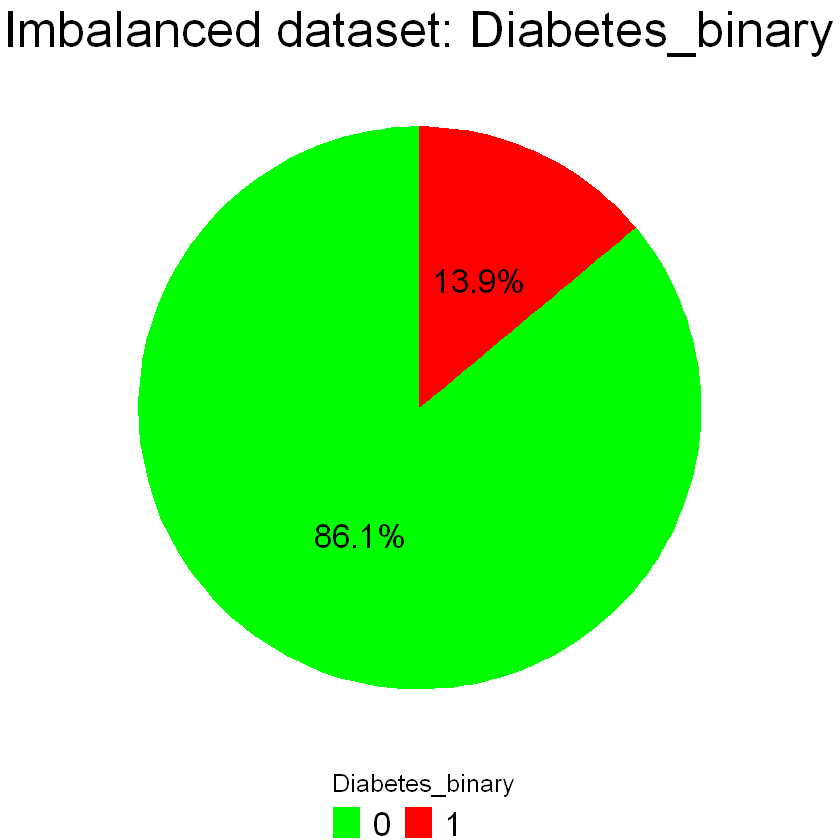

In [338]:
plot_binary_distribution(df, "Diabetes_binary", "Imbalanced dataset: Diabetes_binary")

In [339]:
# COMMENT
# The dataset is imbalanced
# => Apply oversampling method

### 3.2. Dataset oversampling

In [340]:
table(df$Diabetes_binary)


     0      1 
218334  35346 

In [341]:
balanced_df <- ovun.sample(Diabetes_binary ~  ., data = df,
                                  p = 0.5, seed = SEED, 
                                  method = "over")$data

In [342]:
table(balanced_df$Diabetes_binary)


     0      1 
218334 218266 

In [343]:
balanced_df

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,⋯,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1,1,40,1,0,0,0,0,1,⋯,0,5,18,15,1,0,9,4,3,0
2,0,0,0,25,1,0,0,1,0,0,⋯,1,3,0,0,0,0,7,6,1,0
3,1,1,1,28,0,0,0,0,1,0,⋯,1,5,30,30,1,0,9,4,8,0
4,1,0,1,27,0,0,0,1,1,1,⋯,0,2,0,0,0,0,11,3,6,0
5,1,1,1,24,0,0,0,1,1,1,⋯,0,2,3,0,0,0,11,5,4,0
6,1,1,1,25,1,0,0,1,1,1,⋯,0,2,0,2,0,1,10,6,8,0
7,1,0,1,30,1,0,0,0,0,0,⋯,0,3,0,14,0,0,9,6,7,0
8,1,1,1,25,1,0,0,1,0,1,⋯,0,3,0,0,1,0,11,4,4,0
9,0,0,1,24,0,0,0,0,0,1,⋯,0,2,0,0,0,1,8,4,3,0


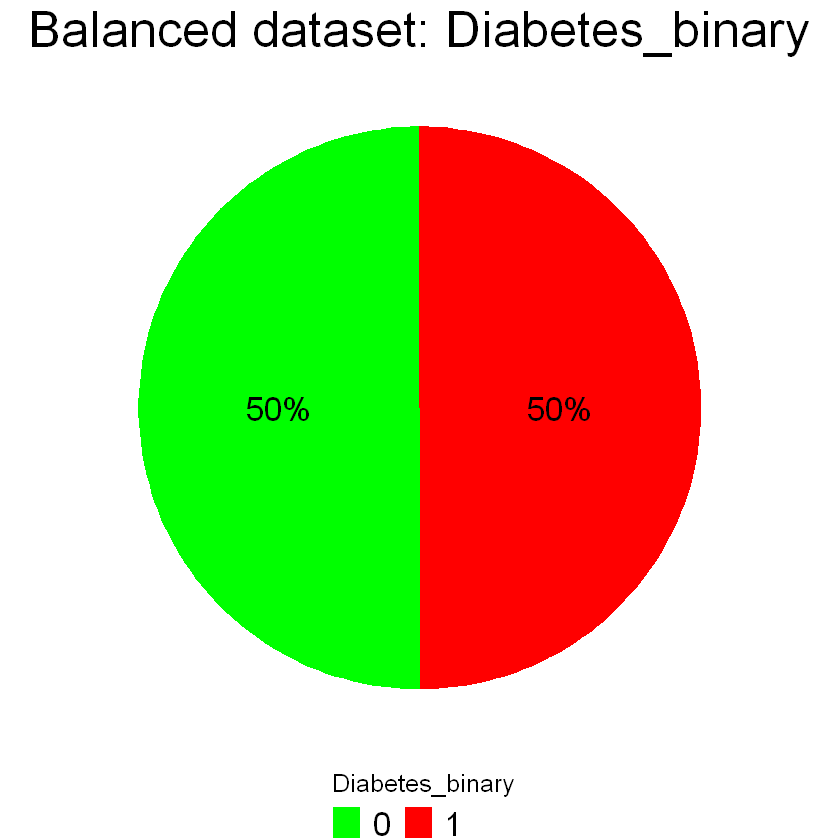

In [344]:
plot_binary_distribution(balanced_df, "Diabetes_binary", "Balanced dataset: Diabetes_binary")

In [345]:
with_diabetes_rows = which(balanced_df$Diabetes_binary == 1)
no_diabetes_rows = which(balanced_df$Diabetes_binary == 0)

### 3.3. Detect Numerical, Binary, Ordinal variables

In [346]:
str(balanced_df)

'data.frame':	436600 obs. of  22 variables:
 $ HighBP              : int  1 0 1 1 1 1 1 1 0 1 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 0 1 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 24 34 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 0 1 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 0 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 0 1 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 2 3 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 0 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 0 30 ...
 $ DiffWalk            : int  1 0 1 0 0 0 0 1 0 1 ...
 $ Sex                

In [347]:
numerical_cols = c("BMI", "MentHlth", "PhysHlth")
binary_cols = c("HighBP", "HighChol", "CholCheck", "Smoker", "Stroke",
               "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies",
               "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost",
               "DiffWalk", "Sex")
ordinal_cols = c("GenHlth", "Age", "Education", "Income")
response_col = "Diabetes_binary"

display_matrix = matrix(c(length(numerical_cols), length(binary_cols), length(ordinal_cols)), nrow = 3)
rownames(display_matrix) = c("numerical_cols", "binary_cols", "ordinal_cols")
colnames(display_matrix) = "Number of variable"
display_matrix

,Number of variable
numerical_cols,3
binary_cols,14
ordinal_cols,4


### 3.4. Numerical variables analysis

In [348]:
# Numerical variables (3): BMI, MentHlth, PhysHlth

In [349]:
psych::describeBy(balanced_df[,numerical_cols], balanced_df[,response_col])


 Descriptive statistics by group 
group: 0
         vars      n  mean   sd median trimmed  mad min max range skew kurtosis
BMI         1 218334 27.81 6.29     27   27.15 4.45  12  98    86 2.33    13.62
MentHlth    2 218334  2.98 7.11      0    0.94 0.00   0  30    30 2.86     7.37
PhysHlth    3 218334  3.64 8.06      0    1.30 0.00   0  30    30 2.50     5.00
           se
BMI      0.01
MentHlth 0.02
PhysHlth 0.02
------------------------------------------------------------ 
group: 1
         vars      n  mean    sd median trimmed  mad min max range skew
BMI         1 218266 31.94  7.36     31   31.23 5.93  13  98    85 1.54
MentHlth    2 218266  4.45  8.93      0    2.01 0.00   0  30    30 2.07
PhysHlth    3 218266  7.94 11.29      1    6.17 1.48   0  30    30 1.15
         kurtosis   se
BMI          5.86 0.02
MentHlth     2.90 0.02
PhysHlth    -0.33 0.02

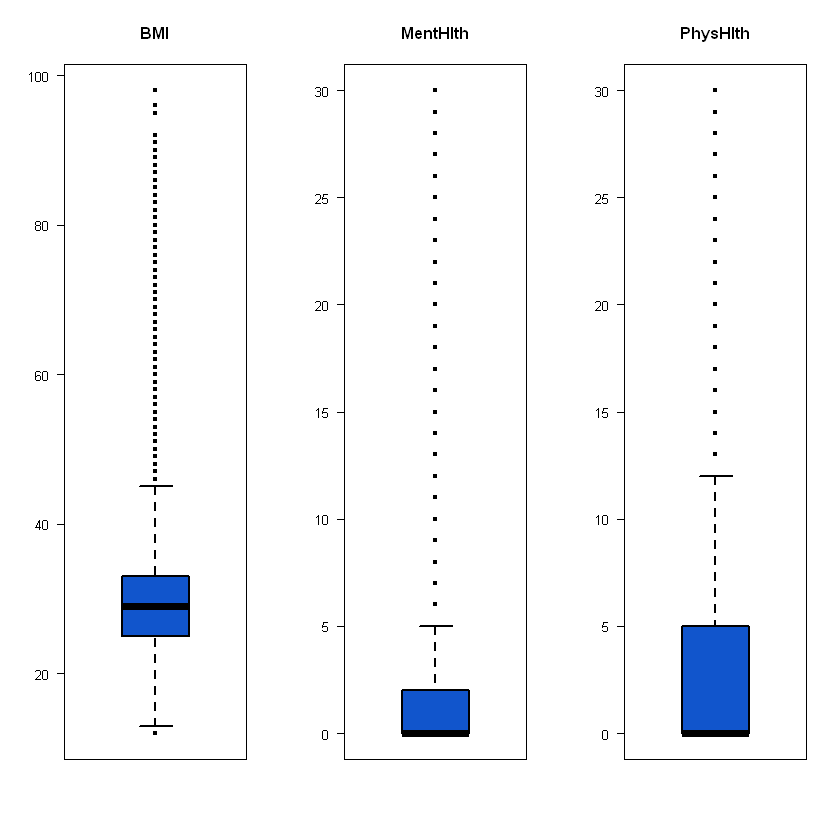

In [350]:
par(mfrow = c(1,3))
boxplot(balanced_df$BMI, main = "BMI", col = MAIN_COLOR, las = 1, lwd = 2)
boxplot(balanced_df$MentHlth, main = "MentHlth", col = MAIN_COLOR, las = 1, lwd = 2)
boxplot(balanced_df$PhysHlth, main = "PhysHlth", col = MAIN_COLOR, las = 1, lwd = 2)

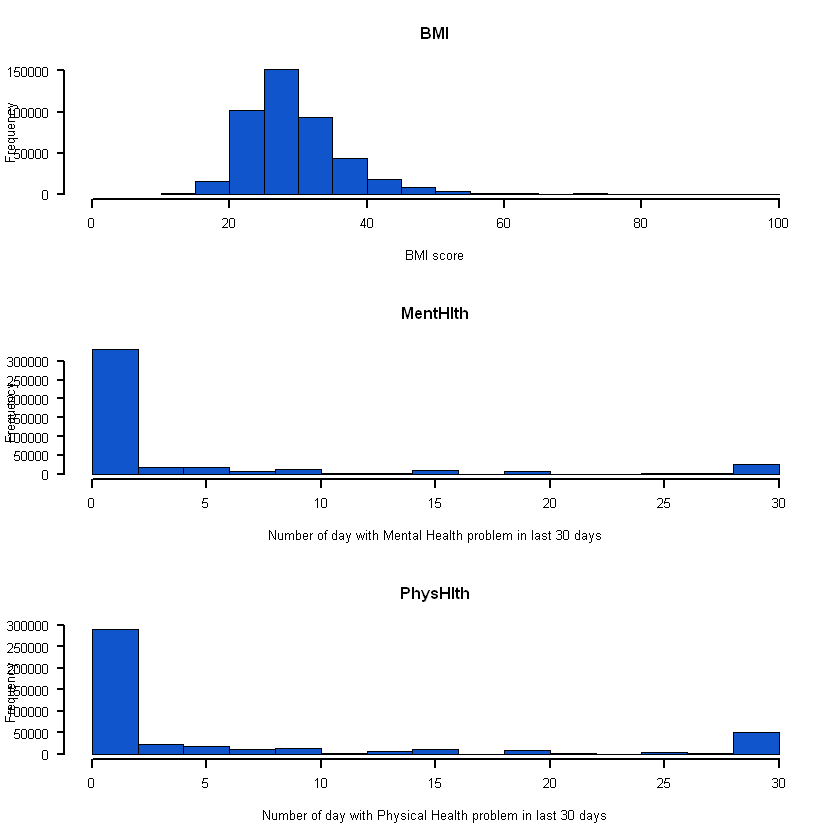

In [351]:
par(mfrow = c(3,1))
hist(balanced_df$BMI, main = "BMI", xlab = "BMI score", col = MAIN_COLOR, las = 1, lwd = 2, xlim = c(0, 100))
hist(balanced_df$MentHlth, main = "MentHlth", xlab = "Number of day with Mental Health problem in last 30 days",
    col = MAIN_COLOR, las = 1, lwd = 2)
hist(balanced_df$PhysHlth, main = "PhysHlth", xlab = "Number of day with Physical Health problem in last 30 days",
    col = MAIN_COLOR, las = 1, lwd = 2)

#### 3.4.1. BMI

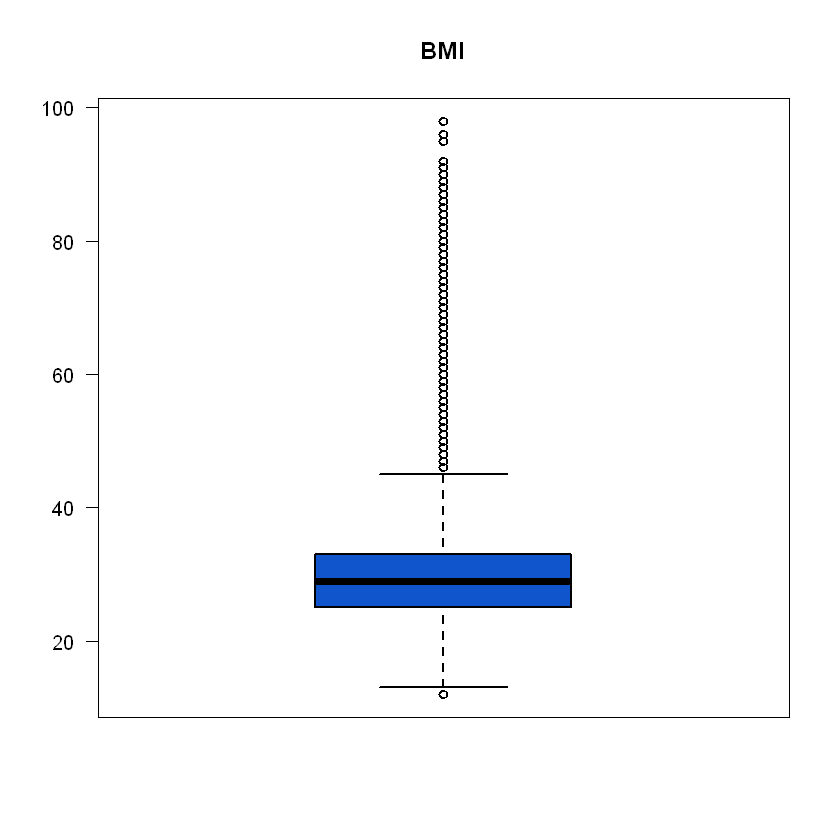

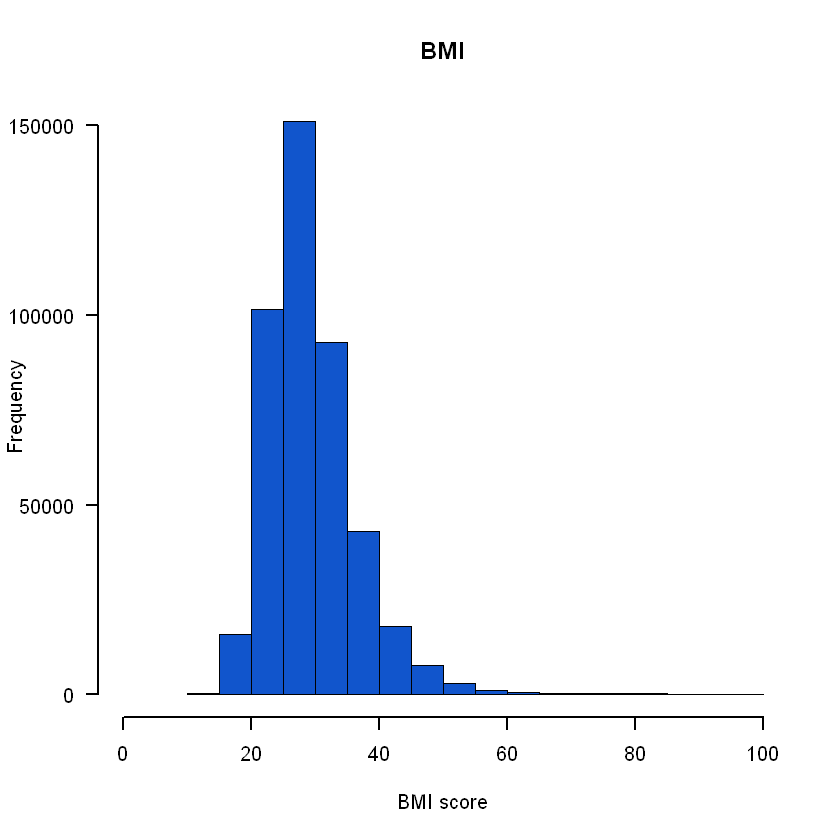

In [352]:
boxplot(balanced_df$BMI, main = "BMI", col = MAIN_COLOR, las = 1, lwd = 2)
hist(balanced_df$BMI, main = "BMI", xlab = "BMI score", col = MAIN_COLOR, las = 1, lwd = 2, xlim = c(0, 100))

In [353]:
BMI_q1 = quantile(balanced_df$BMI, probs = 0.25, names = F)
BMI_q3 = quantile(balanced_df$BMI, probs = 0.75, names = F)
BMI_upper_quartile = BMI_q3 + 1.5 * (BMI_q3 - BMI_q1)
cat("Maximum value of boxplot BMI:", BMI_upper_quartile)

Maximum value of boxplot BMI: 45

#### Question: The percentage of diabetes people having BMI under 45 and over 45.

In [354]:
BMI_THRESH_HOLD = 45

In [355]:
BMI_table = table(ifelse(balanced_df$BMI > BMI_THRESH_HOLD, sprintf("BMI > %d", BMI_THRESH_HOLD), sprintf("BMI < %d", BMI_THRESH_HOLD)),
      ifelse(balanced_df$Diabetes_binary == 1, "diabetes", "no diabetes"))
BMI_table = BMI_table[, c(2, 1)]
BMI_table

          
           no diabetes diabetes
  BMI < 45      215209   207846
  BMI > 45        3125    10420

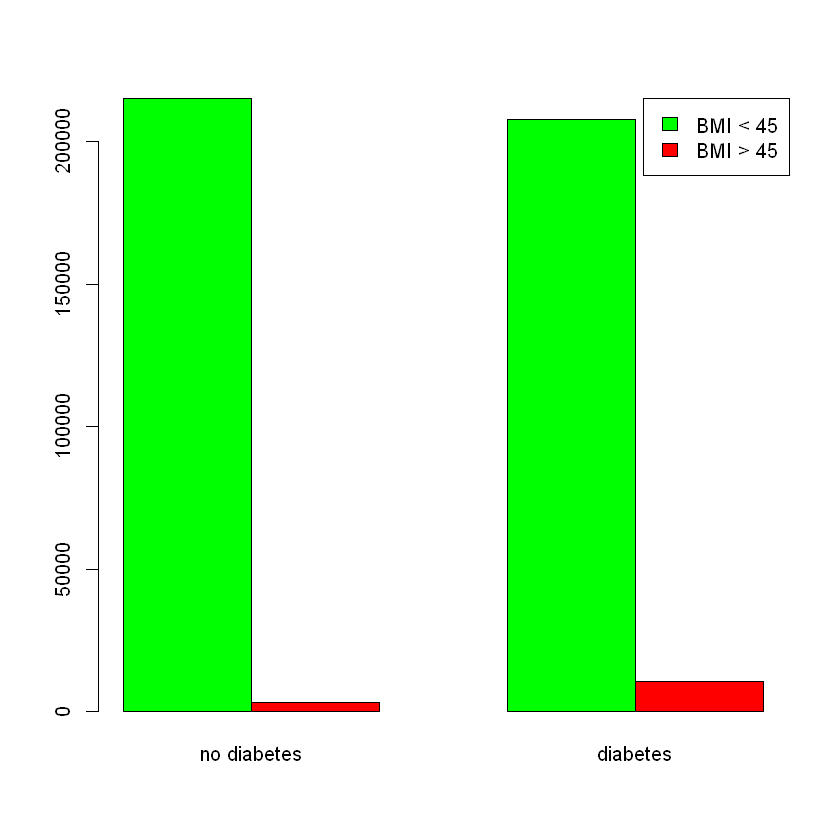

In [356]:
plot_stack_bar_2x2(BMI_table)

In [357]:
DescTools::OddsRatio(BMI_table, conf.level = 0.95)

odds ratio     lwr.ci     upr.ci 
  3.452522   3.315734   3.594953

In [358]:
# COMMENT
# odds ratio = 3.452 > 1
# People with BMI over 45 are 3.452 times more likely to have diabetes than others.
# => Create a binary variable that to distinguish people having BMI over 45.

In [359]:
if (!"BMI_over_45" %in% binary_cols)
{
    binary_cols = append(binary_cols, "BMI_over_45")
}

In [360]:
new_column = as.integer(ifelse(balanced_df$BMI > BMI_THRESH_HOLD, 1, 0))
BMI_index = which(colnames(balanced_df) == "BMI")
balanced_df = cbind(balanced_df[,1:BMI_index], BMI_over_45 = new_column, balanced_df[,(BMI_index+1):ncol(balanced_df)])

In [361]:
balanced_df

,HighBP,HighChol,CholCheck,BMI,BMI_over_45,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,⋯,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1,1,40,0,1,0,0,0,0,⋯,0,5,18,15,1,0,9,4,3,0
2,0,0,0,25,0,1,0,0,1,0,⋯,1,3,0,0,0,0,7,6,1,0
3,1,1,1,28,0,0,0,0,0,1,⋯,1,5,30,30,1,0,9,4,8,0
4,1,0,1,27,0,0,0,0,1,1,⋯,0,2,0,0,0,0,11,3,6,0
5,1,1,1,24,0,0,0,0,1,1,⋯,0,2,3,0,0,0,11,5,4,0
6,1,1,1,25,0,1,0,0,1,1,⋯,0,2,0,2,0,1,10,6,8,0
7,1,0,1,30,0,1,0,0,0,0,⋯,0,3,0,14,0,0,9,6,7,0
8,1,1,1,25,0,1,0,0,1,0,⋯,0,3,0,0,1,0,11,4,4,0
9,0,0,1,24,0,0,0,0,0,0,⋯,0,2,0,0,0,1,8,4,3,0


#### 3.4.2. MentHlth

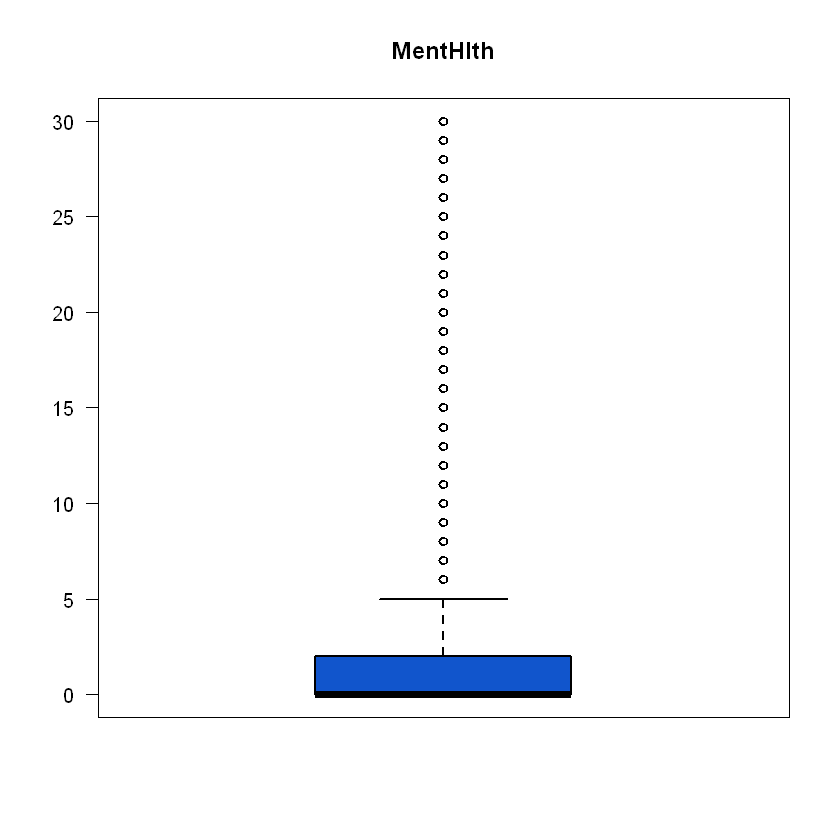

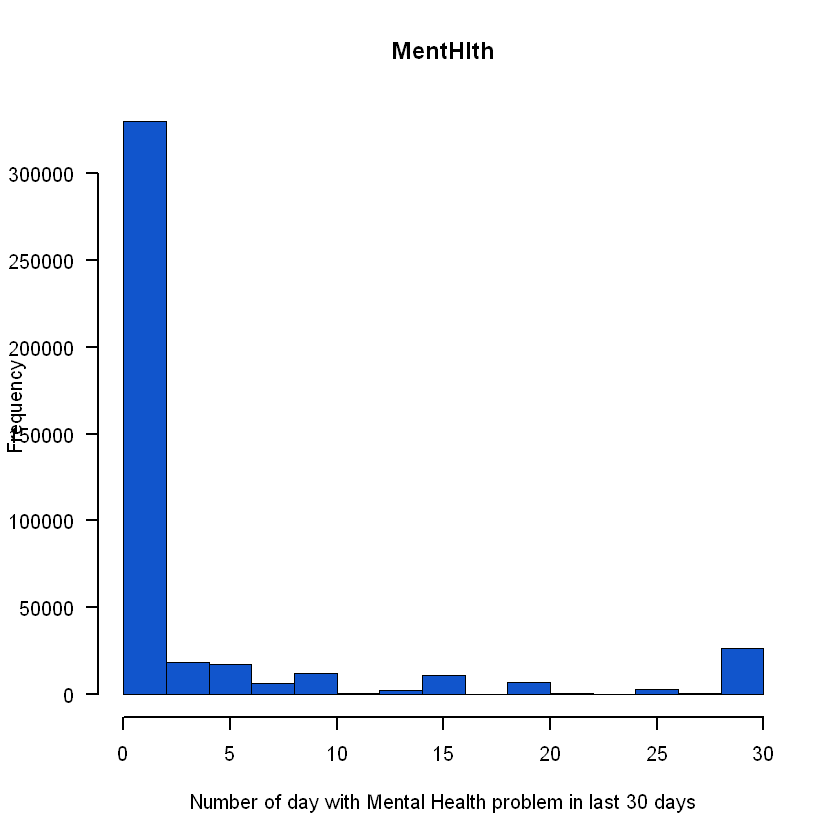

In [390]:
boxplot(balanced_df$MentHlth, main = "MentHlth", col = MAIN_COLOR, las = 1, lwd = 2)
hist(balanced_df$MentHlth, main = "MentHlth", xlab = "Number of day with Mental Health problem in last 30 days",
    col = MAIN_COLOR, las = 1, lwd = 2, xlim = c(0, 30))

#### Question: The percentage of diabetes people having MentHlth or not.

In [391]:
MentHlth_table = table(ifelse(balanced_df$MentHlth > 0, "have MentHlth", "no MentHlth"),
      ifelse(balanced_df$Diabetes_binary == 1, "diabetes", "no diabetes"))

In [392]:
MentHlth_table = Rev(MentHlth_table)

In [393]:
MentHlth_table

               
                no diabetes diabetes
  no MentHlth        152277   144346
  have MentHlth       66057    73920

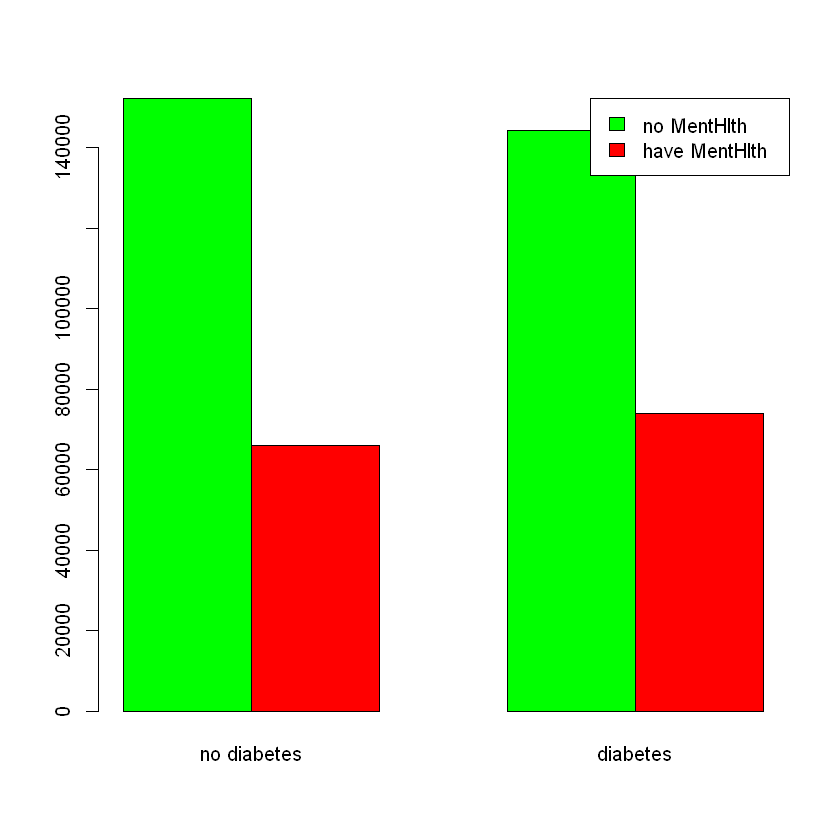

In [394]:
plot_stack_bar_2x2(MentHlth_table)

In [396]:
DescTools::OddsRatio(MentHlth_table, conf.level = 0.95)

odds ratio     lwr.ci     upr.ci 
  1.180518   1.165590   1.195638

In [397]:
# COMMENT
# odd ratio is close to 1
# => No creating new binary variable

#### 3.4.3. PhysHlth

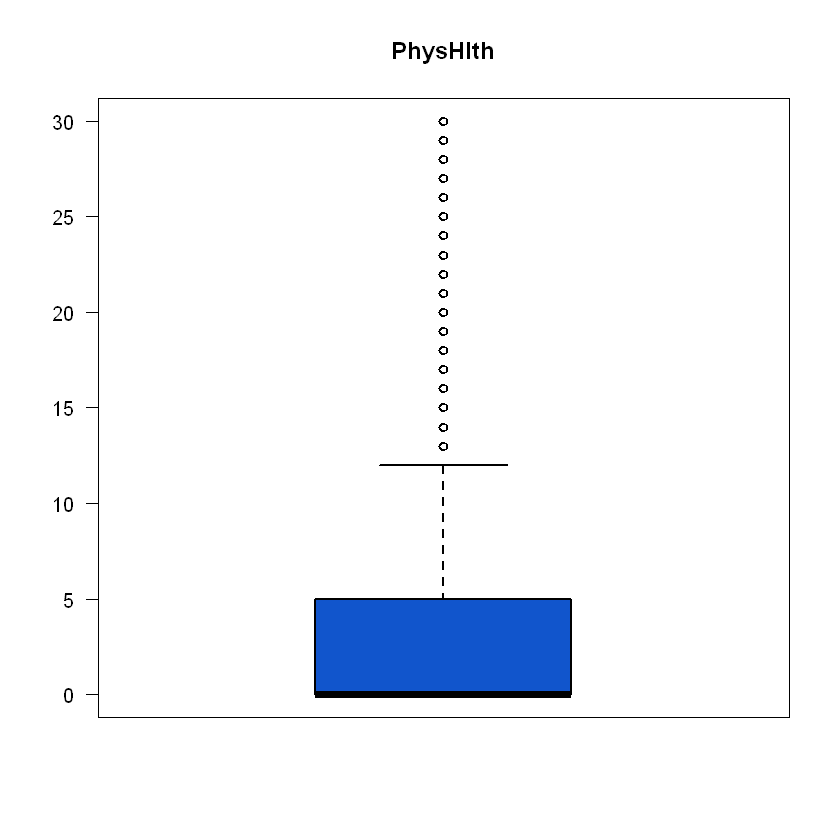

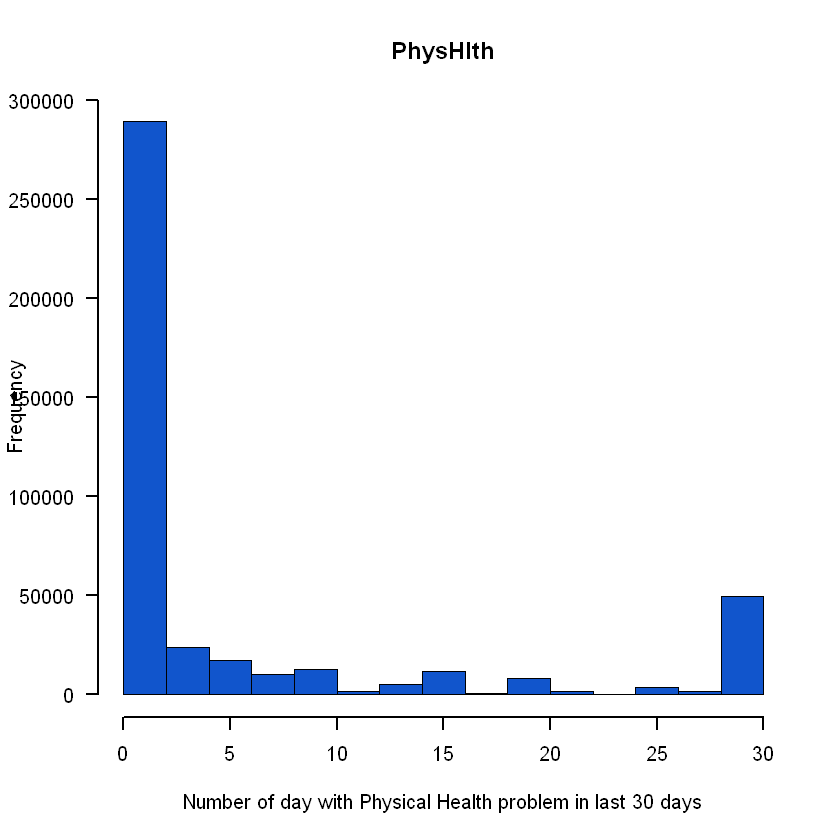

In [399]:
boxplot(balanced_df$PhysHlth, main = "PhysHlth", col = MAIN_COLOR, las = 1, lwd = 2)
hist(balanced_df$PhysHlth, main = "PhysHlth", xlab = "Number of day with Physical Health problem in last 30 days",
    col = MAIN_COLOR, las = 1, lwd = 2, xlim = c(0, 30))

#### Question: The percentage of diabetes people having PhysHlth or not.

In [402]:
PhysHlth_table = table(ifelse(balanced_df$PhysHlth > 0, "have PhysHlth", "no PhysHlth"),
      ifelse(balanced_df$Diabetes_binary == 1, "diabetes", "no diabetes"))

In [403]:
PhysHlth_table = Rev(PhysHlth_table)

In [404]:
PhysHlth_table

               
                no diabetes diabetes
  no PhysHlth        143312   103498
  have PhysHlth       75022   114768

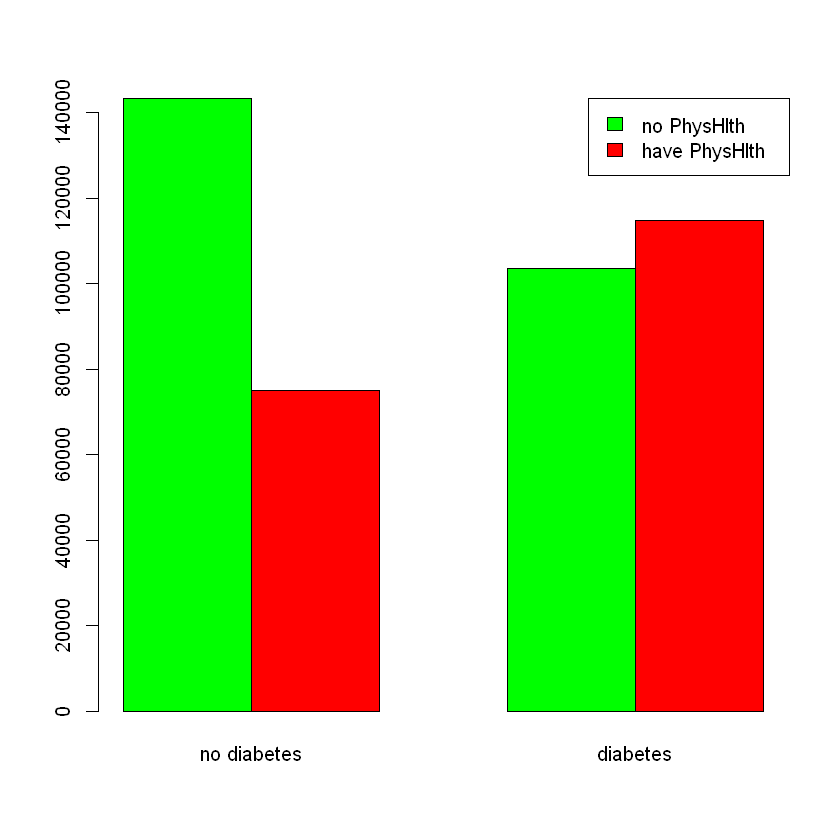

In [405]:
plot_stack_bar_2x2(PhysHlth_table)

In [406]:
OddsRatio(PhysHlth_table, conf.level = 0.95)

odds ratio     lwr.ci     upr.ci 
  2.118277   2.092612   2.144257

In [407]:
# odds ratio = 2.118 > 1
# People have PhysHlth are 2.118 times more likely to have diabetes than others.
# => Create a binary variable that to distinguish people having PhysHlth.

In [408]:
if (! "havePhysHlth" %in% binary_cols)
{
    binary_cols = append(binary_cols, "havePhysHlth")
}

In [409]:
binary_cols

[1] "HighBP"               "HighChol"             "CholCheck"           
 [4] "Smoker"               "Stroke"               "HeartDiseaseorAttack"
 [7] "PhysActivity"         "Fruits"               "Veggies"             
[10] "HvyAlcoholConsump"    "AnyHealthcare"        "NoDocbcCost"         
[13] "DiffWalk"             "Sex"                  "BMI_over_45"         
[16] "havePhysHlth"

In [410]:
new_column = as.integer(ifelse(balanced_df$PhysHlth > 0, 1, 0))
PhysHlth_index = which(colnames(balanced_df) == "PhysHlth")
balanced_df = cbind(balanced_df[,1:PhysHlth_index], havePhysHlth = new_column, balanced_df[,(PhysHlth_index+1):ncol(balanced_df)])

In [411]:
balanced_df

,HighBP,HighChol,CholCheck,BMI,BMI_over_45,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,⋯,GenHlth,MentHlth,PhysHlth,havePhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1,1,40,0,1,0,0,0,0,⋯,5,18,15,1,1,0,9,4,3,0
2,0,0,0,25,0,1,0,0,1,0,⋯,3,0,0,0,0,0,7,6,1,0
3,1,1,1,28,0,0,0,0,0,1,⋯,5,30,30,1,1,0,9,4,8,0
4,1,0,1,27,0,0,0,0,1,1,⋯,2,0,0,0,0,0,11,3,6,0
5,1,1,1,24,0,0,0,0,1,1,⋯,2,3,0,0,0,0,11,5,4,0
6,1,1,1,25,0,1,0,0,1,1,⋯,2,0,2,1,0,1,10,6,8,0
7,1,0,1,30,0,1,0,0,0,0,⋯,3,0,14,1,0,0,9,6,7,0
8,1,1,1,25,0,1,0,0,1,0,⋯,3,0,0,0,1,0,11,4,4,0
9,0,0,1,24,0,0,0,0,0,0,⋯,2,0,0,0,0,1,8,4,3,0
